In [81]:
import pandas as pd
import utils

TS = 48


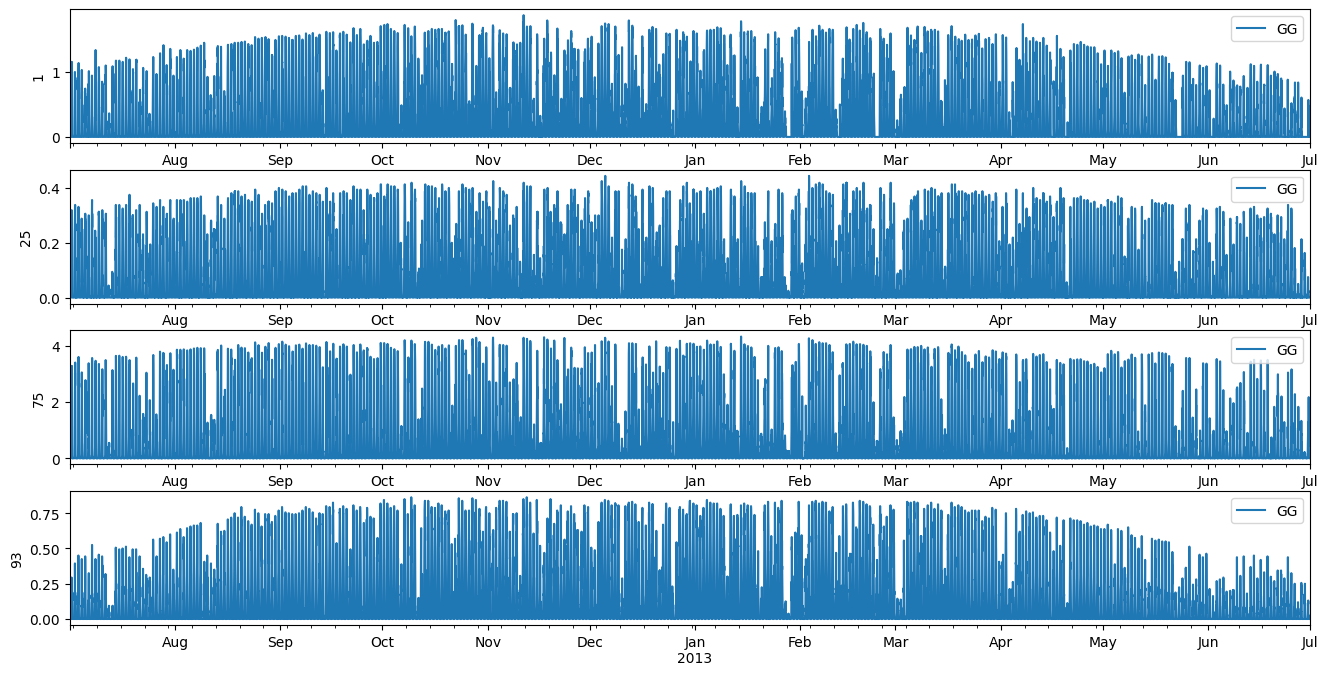

In [82]:
import matplotlib.pyplot as plt

samples = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
samples = [221, 202, 239, 273]
samples = [1, 25, 75, 93]

# samples = list(range(291, 301))
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', samples, TS)

fig, axes = plt.subplots(nrows=len(df_raw), ncols=1, figsize=(16,8))
for i, df in enumerate(df_raw):
    df.columns.name = None

    df[['GG']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(samples[i]))
    

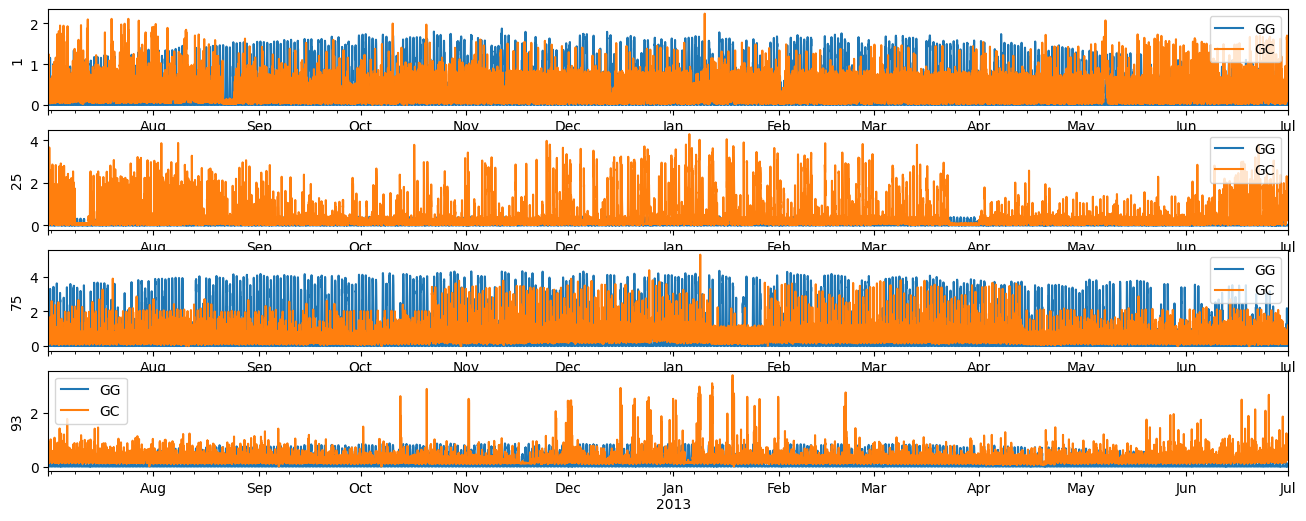

In [83]:
samples = [1, 6, 25, 75, 82, 93]
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', samples, TS)

df_sel = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, s in enumerate(selected):
    df = df_raw[samples.index(s)]
    df_sel.append(df)
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))

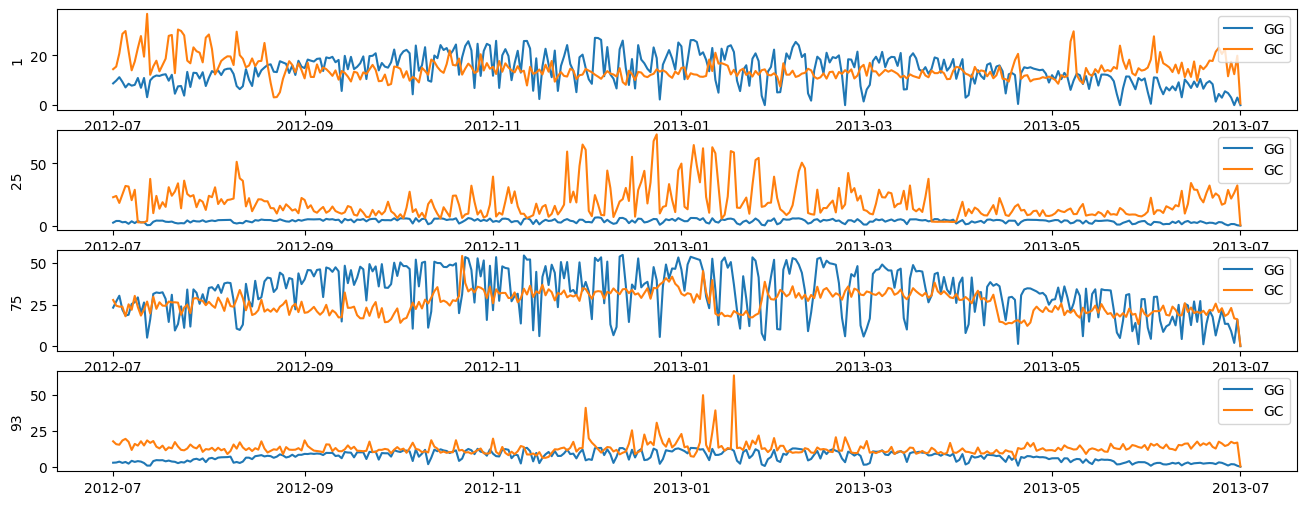

In [84]:
df_daily = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df1 = df.groupby(df.index.date).sum()
    df_daily.append(df1)
    df1[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))
    

68.3% -0.5952415710287773
86.6% -0.8975620426162253
95.0% -1.1998825142036733
scss 0.24605846840606838 0.23838402510358192
68.3% -0.31161166098254395
86.6% -0.6224214298299804
95.0% -0.9332311986774167
scss 0.623200695420299 0.12494980416263346
68.3% -1.509997957717916
86.6% -2.1947951957092937
95.0% -2.879592433700672
scss 0.2051902749255774 0.2577620340391802
68.3% -0.21669114807615344
86.6% -0.3883227380959653
95.0% -0.5599543281157772
scss 0.5261533417856833 0.28266973067883916


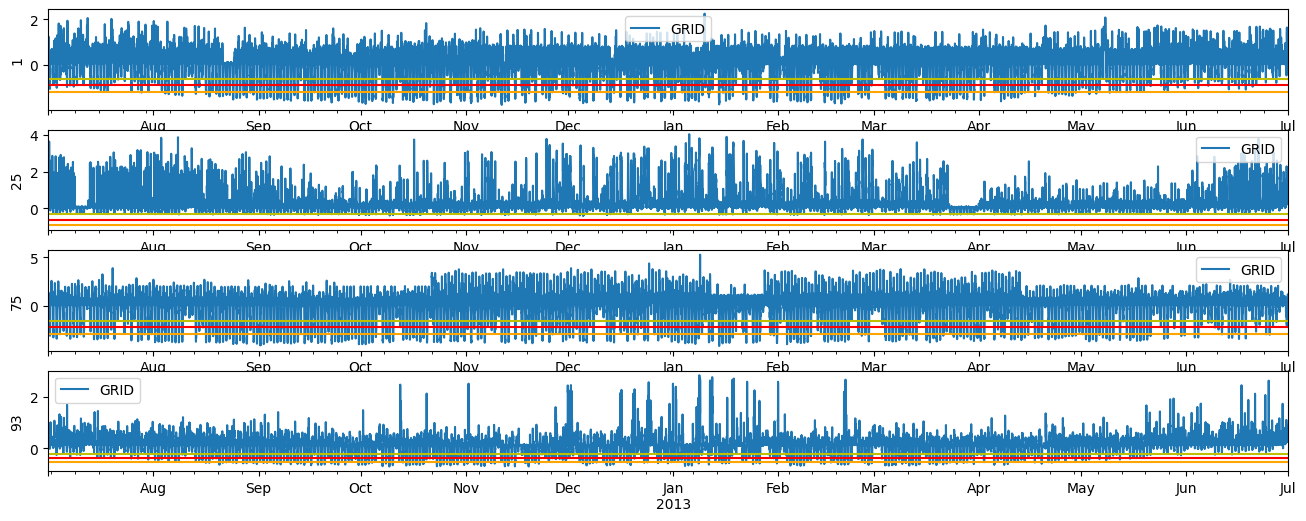

In [85]:
import numpy as np

fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df['GRID'] = df['GC'] - df['GG']
    df['PAT'] = np.where(df['GRID'] <= 0, 1, -1)
    
    gd_export = df[df['GRID']<0]['GRID'].sum()
    gd_import = df[df['GRID']>0]['GRID'].sum()
    df[['GRID']].plot(ax=axes[i])

    d_68 = df['GRID'].mean()-1.0*df['GRID'].std()
    d_86 = df['GRID'].mean()-1.5*df['GRID'].std()
    d_95 = df['GRID'].mean()-2.0*df['GRID'].std()
    print('68.3%', d_68)
    print('86.6%', d_86)
    print('95.0%', d_95)

    axes[i].axhline(d_68, color='y')
    axes[i].axhline(d_86, color='r')
    axes[i].axhline(d_95.mean(), color='orange')
    
    axes[i].set_ylabel('{}'.format(s))
    sc = 1 + gd_export/df['GG'].sum()
    ss = 1 - gd_import/df['GC'].sum()
    print('scss', sc, ss)
    

In [86]:
import numpy as np
    
def sim_ss_sc(pv, ld, c, cmin=0.10, cmax=0.95, cinit=0.10):
    soc_sts = c*cinit
    soc_max = c*cmax
    soc_min = c*cmin
    grid_imp = 0
    grid_exp = 0
    for p, l in zip(pv, ld):
        if p > l: # charging
            charge = min(soc_max - soc_sts, p - l)
            grid_exp += p - l - charge
        else: # discharging
            charge = -min(soc_sts - soc_min, l - p)
            grid_imp += l - p + charge
        soc_sts += charge

    return grid_imp, grid_exp


2 An exception occurred.


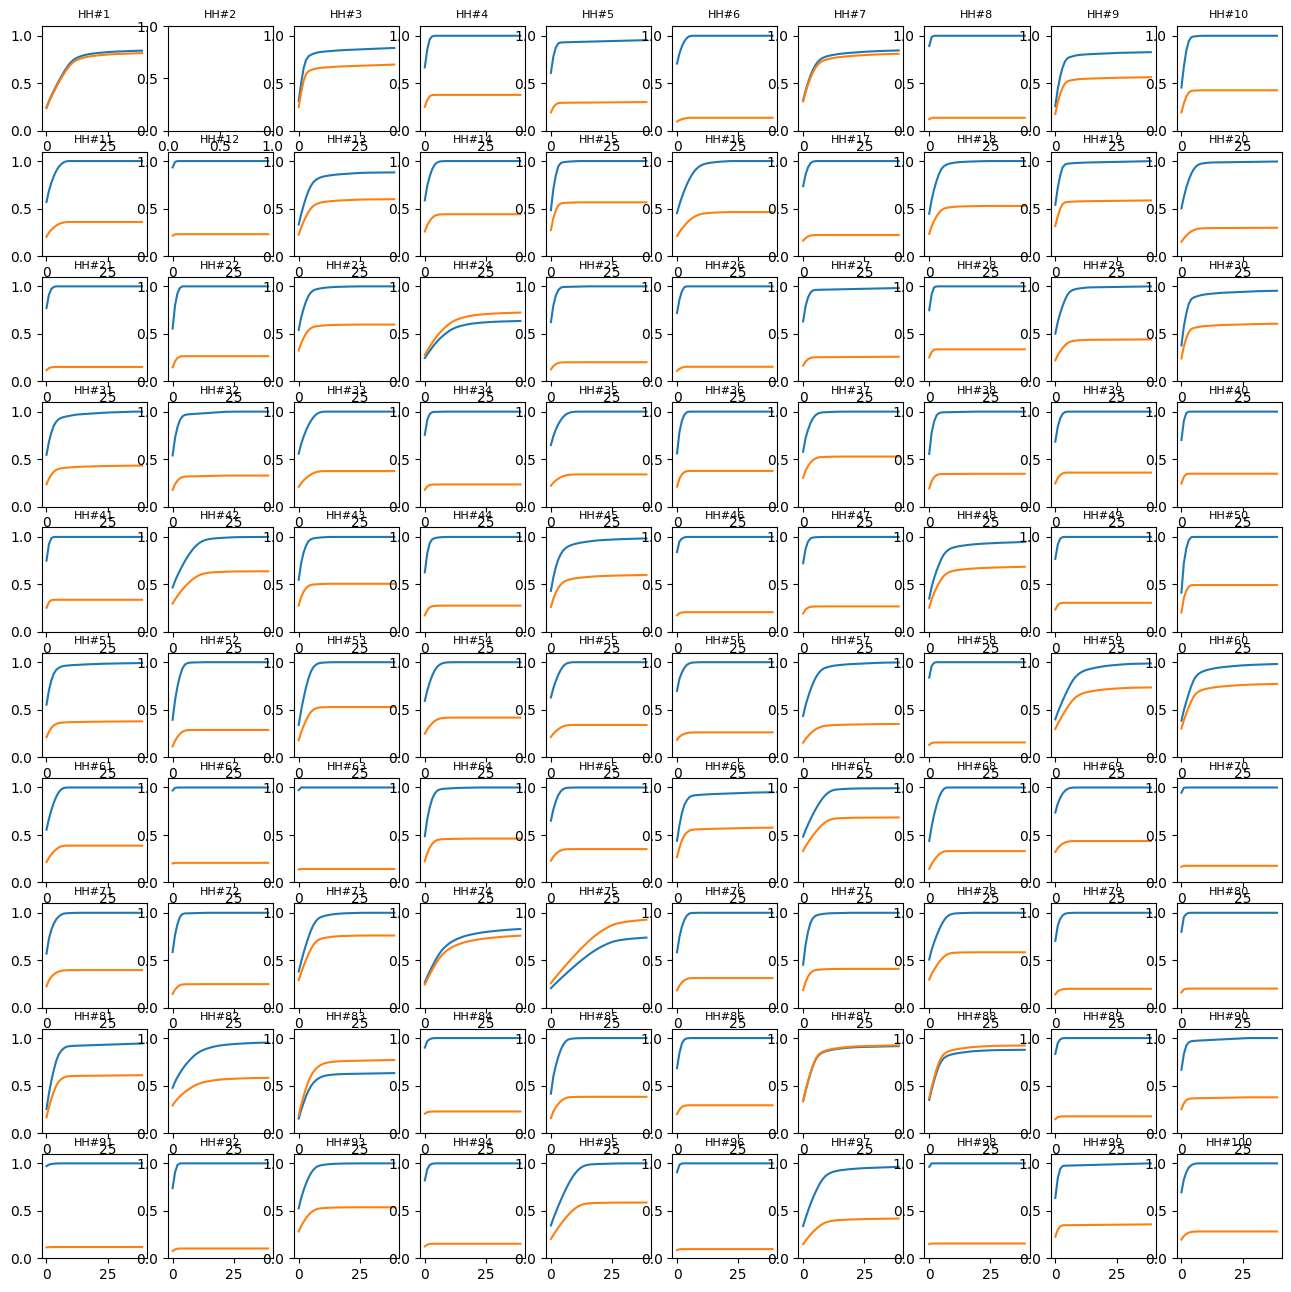

In [87]:
import pandas as pd
import utils
import matplotlib.pyplot as plt

selected = list(range(1, 101))
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(16,16))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    try:
        sc_list = []
        ss_list = []
        for c in range(40):
            gimp, gexp = sim_ss_sc(df['GG'].values, df['GC'].values, c)
            sc = 1 - gexp/df['GG'].sum()
            ss = 1 - gimp/df['GC'].sum()
            sc_list.append(sc)
            ss_list.append(ss)
        axes[i//10, i%10].plot(sc_list, label='SC')
        axes[i//10, i%10].plot(ss_list, label='SS')
        # axes[i//10, i%10].set_xlabel('Capacity[kwh]')
        # axes[i//10, i%10].set_ylabel('SC and SS[%]')
        axes[i//10, i%10].set_title(f'HH#{s}', fontsize=8)
        # axes[i//10, i%10].legend()
        axes[i//10, i%10].set_ylim((0, 1.1))
    except:
        axes[i//10, i%10].set_title(f'HH#{s}', fontsize=8)

1 (10, 15, 20, 30) 0.968810489018319
25 (-2, 6, 13, 28) 0.20049689462936923
75 (25, 33, 41, 58) 1.2562097990885321
93 (1, 4, 8, 15) 0.5372383072195301


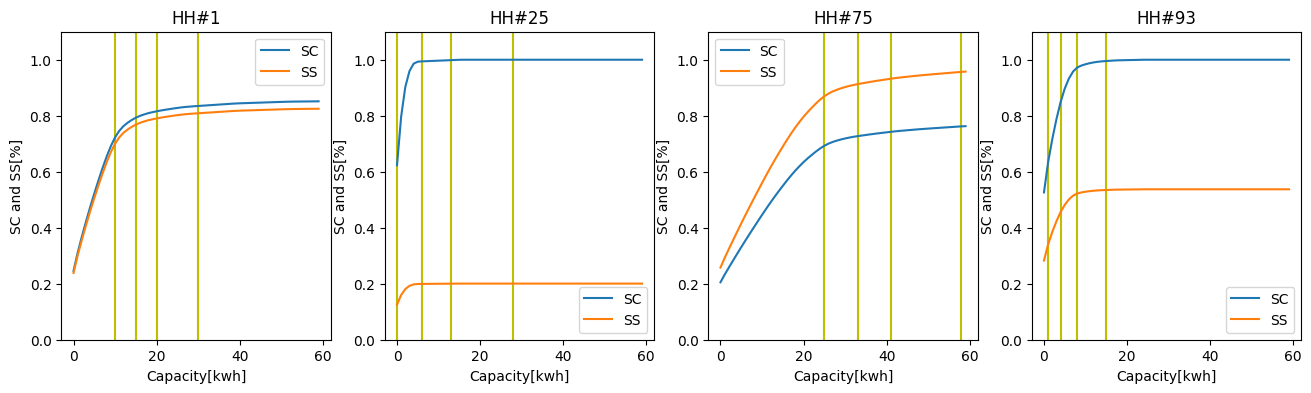

In [88]:
import matplotlib.pyplot as plt

selected = [1, 25, 75, 93]
# selected = [221, 202, 239, 273]
# selected = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)
ncols = 4
fig, axes = plt.subplots(nrows=len(selected)//ncols, ncols=ncols, figsize=(16,4))
if axes.ndim ==1:
    axes = np.reshape(axes, (-1, ncols))

for i, (s, df) in enumerate(zip(selected, df_sel)):
    sc_list = []
    ss_list = []

    stds = utils.cal_stds(df)
    print(s, stds, df['GG'].sum()/df['GC'].sum())
    for p in stds:
        axes[i//ncols, i%ncols].axvline(max(0,p), color='y')

    for c in range(60):
        gimp, gexp = sim_ss_sc(df['GG'].values, df['GC'].values, c)
        sc = 1 - gexp/df['GG'].sum()
        ss = 1 - gimp/df['GC'].sum()
        sc_list.append(sc)
        ss_list.append(ss)
    axes[i//ncols, i%ncols].plot(sc_list, label='SC')
    axes[i//ncols, i%ncols].plot(ss_list, label='SS')
    axes[i//ncols, i%ncols].set_ylabel('SC and SS[%]')
    axes[i//ncols, i%ncols].set_title(f'HH#{s}')
    axes[i//ncols, i%ncols].legend()
    axes[i//ncols, i%ncols].set_ylim((0, 1.1))

    axes[-1, i%ncols].set_xlabel('Capacity[kwh]')


GG, GC, mean, std 13.975975409836067 14.42591256830601 -0.44993715846994525 12.88611660340045
68.3% 8.140807243797022
86.6% 12.436179444930506
95.0% 16.731551646063988
1183.69 5115.207
GG, GC, mean, std 3.721459016393443 18.56118032786885 -14.83972131147541 19.08987326988805
68.3% -2.113139131550044
86.6% 4.250151958412639
95.0% 10.613443048375322
12.537999999999998 1362.054
GG, GC, mean, std 32.95318032786886 26.23222677595628 6.720953551912568 20.911391708202963
68.3% 20.66188135738121
86.6% 27.63234526011553
95.0% 34.60280916284985
3614.302 12060.864000000001
GG, GC, mean, std 7.033967213114754 13.092825136612019 -6.058857923497269 9.381708409697813
68.3% 0.19561434963460655
86.6% 3.3228504862005446
95.0% 6.450086622766482
86.34899999999999 2574.432


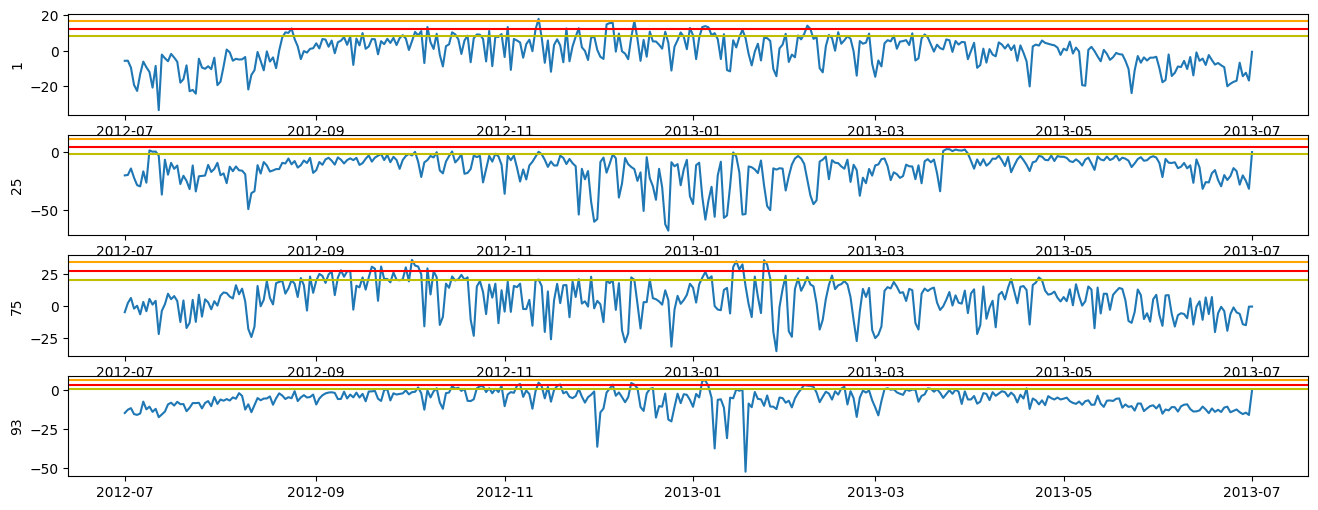

In [89]:
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_daily)):
    df['Diff'] = df['GG'] - df['GC']
    df['Diff'].plot(ax=axes[i])
    
    print('GG, GC, mean, std', df['GG'].mean(), df['GC'].mean(), df['Diff'].mean(), 1.5*df['Diff'].std())
    d_68 = df['Diff'].mean()+1.0*df['Diff'].std()
    d_86 = df['Diff'].mean()+1.5*df['Diff'].std()
    d_95 = df['Diff'].mean()+2.0*df['Diff'].std()
    print('68.3%', d_68)
    print('86.6%', d_86)
    print('95.0%', d_95)

    axes[i].axhline(d_68, color='y')
    axes[i].axhline(d_86, color='r')
    axes[i].axhline(d_95.mean(), color='orange')
    axes[i].set_ylabel('{}'.format(s))

    df['D86'] = df['Diff'] - d_86
    print(df[df['Diff']>0]['Diff'].sum(), df['GG'].sum())


[0.06027265 0.1205453  0.18081795 0.24109059 0.30136324 0.36163589]
0.29196386986301365 0.30136324200913245
[0.07755014 0.15510027 0.23265041 0.31020055 0.38775068 0.46530082]
0.07774280821917808 0.38775068493150683
[0.1096004 0.2192008 0.3288012 0.4384016 0.548002  0.6576024]
0.6884054794520548 0.548001997716895
[0.0547029 0.1094058 0.1641087 0.2188116 0.2735145 0.3282174]
0.14694246575342468 0.27351449771689496


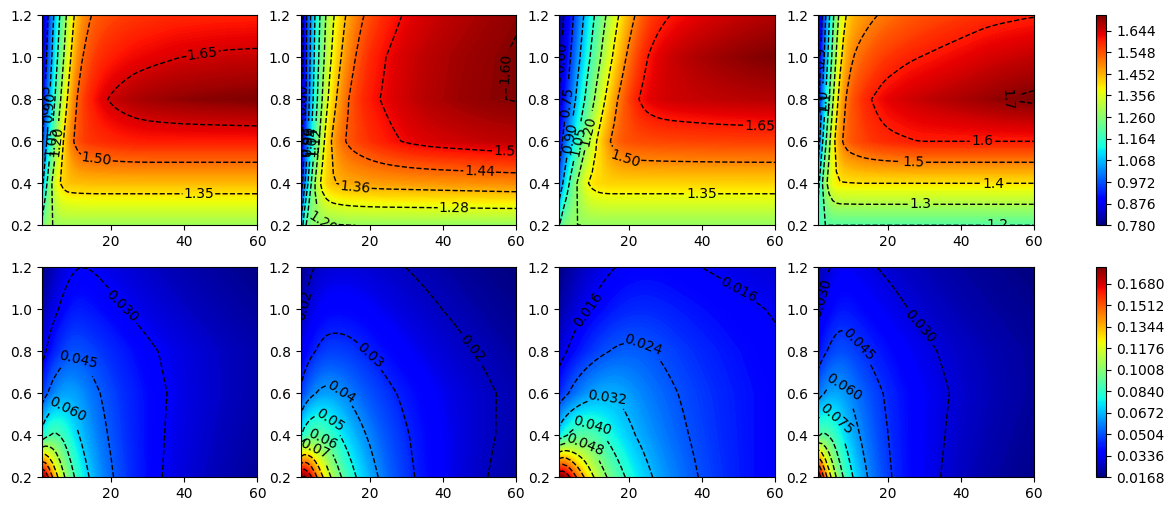

In [121]:
import matplotlib.pyplot as plt
import numpy as np
    
def factor_sssc(pv, ld, c, cmin=0.10, cmax=0.95, cinit=0.10):
    soc_sts = c*cinit
    soc_max = c*cmax
    soc_min = c*cmin
    grid_imp = 0
    grid_exp = 0
    for p, l in zip(pv, ld):
        if p > l: # charging
            charge = min(soc_max - soc_sts, p - l)
            grid_exp += p - l - charge
        else: # discharging
            charge = -min(soc_sts - soc_min, l - p)
            grid_imp += l - p + charge
        soc_sts += charge

    sc = 1 - grid_exp/pv.sum()
    ss = 1 - grid_imp/ld.sum() 

    return sc, ss

C_b = 1
C_p = 100
selected = [1, 25, 75, 93]
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)
WW = np.linspace(0.2, 1.2, num=6)
WX = np.linspace(1, 60, num=60)

fig, axes = plt.subplots(nrows=2, ncols=len(selected), figsize=(16,6))
fig.set_facecolor('white')

for i, (s, df) in enumerate(zip(selected, df_sel)):
    WY =  WW * (df['GC'].mean() / df['GG'].mean())
    print(WY*df['GG'].mean())
    print(df['GG'].mean(), df['GC'].mean())
    X, Y = np.meshgrid(WX, WW)
    Z1 = np.zeros((len(WY), len(WX)))
    Z2 = np.zeros((len(WY), len(WX)))
        
    for j, w in enumerate(WY):        
        for k, c in enumerate(WX):
            sc, ss = factor_sssc(df['GG'].values*w, df['GC'].values, c)                        
            Z1[j][k] = sc + ss
            Z2[j][k] = abs(sc+ss)/(C_p*w*df['GG'].mean() + C_b*c)
        
    contour11 = axes[0, i].contour(X, Y, Z1, levels=10, colors='k', linewidths=1, linestyles='--') 
    contour12 = axes[0, i].contourf(X, Y, Z1, levels=256, cmap='jet')    
    axes[0, i].clabel(contour11, contour11.levels, inline=True)

    contour21 = axes[1, i].contour(X, Y, Z2, levels=10, colors='k', linewidths=1, linestyles='--') 
    contour22 = axes[1, i].contourf(X, Y, Z2, levels=256, cmap='jet')    
    axes[1, i].clabel(contour21, contour21.levels, inline=True)
    
fig.colorbar(contour12, ax=axes[0]) 
fig.colorbar(contour22, ax=axes[1]) 
